# 分類器の精度指標

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score,precision_score,recall_score,precision_recall_curve,f1_score,roc_curve,auc
from sklearn.model_selection import train_test_split

from scipy.stats import hmean

In [2]:
# データロード
df = sns.load_dataset('iris')

y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]

In [3]:
# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [4]:
# 学習
model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
# 予測
y_pred = model.predict(X_test)

## 混合行列

In [6]:
# 「行：正解、列：予測」を意味
cm = confusion_matrix(y_test, y_pred)

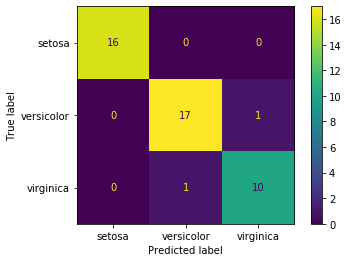

In [7]:
# 混合行列表示
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

## Accuracy（正解率）

In [8]:
y_true_ac = np.array([1,1,0,1,0,0,1,1])
y_pred_ac = np.array([1,1,1,0,0,1,0,1])
accuracy_score(y_true_ac, y_pred_ac)

0.5

## Precision（適合率）

In [9]:
y_true_pr = np.array([1,1,0,1,0,0,1,1])
y_pred_pr = np.array([1,1,1,0,0,1,0,1])
precision_score(y_true_pr, y_pred_pr)

0.6

## Recall（再現率）

In [10]:
y_true_rec = np.array([1,1,0,1,0,0,1,1])
y_pred_rec = np.array([1,1,1,0,0,1,0,1])
recall_score(y_true_rec, y_pred_rec)

0.6

## Specificity（特異度）

In [11]:
y_true_sp = np.array([1,1,0,1,0,0,1,1])
y_pred_sp = np.array([1,1,1,0,0,1,0,1])

In [12]:
recall_score(y_true_sp!=1, y_pred_sp!=1)

0.3333333333333333

## 他クラス評価におけるPrecision

In [13]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [14]:
# avearage none
precision_score(y_test,y_pred,average=None)

array([1.        , 0.94444444, 0.90909091])

In [15]:
# avearage macro
precision_score(y_test,y_pred,average='macro')

0.9511784511784511

In [16]:
# avearage micro
precision_score(y_test,y_pred,average='micro')

0.9555555555555556

In [17]:
# average precision micro = accurancy
accuracy_score(y_test,y_pred)

0.9555555555555556

## Precision-Recall Curve

In [18]:
df = pd.read_csv('data/heart_preprocessed.csv')
df.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_electrocardiographic_left ventricular hypertrophy,rest_electrocardiographic_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_normal,thalassemia_reversable defect
0,52,125,212,168,1.0,2,0,1,0,0,1,1,0,0,0,0,0,0,1
1,53,140,203,155,3.1,0,0,1,0,0,1,0,0,1,1,0,1,0,1
2,70,145,174,125,2.6,0,0,1,0,0,1,1,0,0,1,0,1,0,1
3,61,148,203,161,0.0,1,0,1,0,0,1,1,0,0,0,0,0,0,1
4,62,138,294,106,1.9,3,0,0,0,0,1,0,0,0,0,1,0,1,0


In [19]:
# 目的変数、説明変数
y_col = 'target'
X = df.drop(columns=[y_col])
y = df[y_col]

# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 学習
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# 予測（確率）
y_pred_proba = model.predict_proba(X_test)

In [20]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])

In [21]:
precision[:10]

array([0.5509434 , 0.54924242, 0.55343511, 0.55555556, 0.55984556,
       0.5620155 , 0.56640625, 0.56862745, 0.57312253, 0.58      ])

In [22]:
recall[:10]

array([1.        , 0.99315068, 0.99315068, 0.99315068, 0.99315068,
       0.99315068, 0.99315068, 0.99315068, 0.99315068, 0.99315068])

In [23]:
thresholds[:10]

array([0.01653742, 0.01660076, 0.0168656 , 0.01737142, 0.01760092,
       0.01804646, 0.02207049, 0.02247327, 0.02319608, 0.02390539])

In [24]:
y_pred_proba[:10]

array([[0.49520585, 0.50479415],
       [0.28366802, 0.71633198],
       [0.99732492, 0.00267508],
       [0.06897633, 0.93102367],
       [0.47851468, 0.52148532],
       [0.99002332, 0.00997668],
       [0.66307864, 0.33692136],
       [0.7927538 , 0.2072462 ],
       [0.3021324 , 0.6978676 ],
       [0.3021324 , 0.6978676 ]])

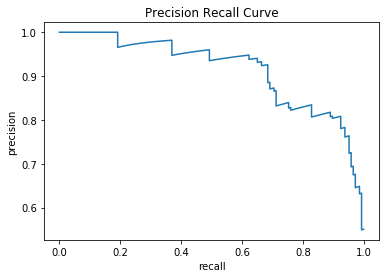

In [25]:
# 回帰直線
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision Recall Curve')
plt.show()

In [26]:
model.classes_

array([0, 1])

## F値

In [27]:
y_true_f = [1, 0, 0, 1, 0, 0, 1, 1]
y_pred_f = [1, 1, 1, 0, 0, 1, 0, 1]

f1_score(y_true_f, y_pred_f)

0.4444444444444445

### 調和平均ver

In [28]:
rec = recall_score(y_true_f, y_pred_f)
pre = precision_score(y_true_f, y_pred_f)

# recallとprecisionの調和平均でF値を計算
hmean([rec, pre])

0.4444444444444444

## Precision_Recall_F-value

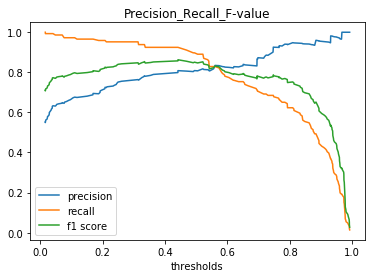

66th thresholds=(0.44164670248434684) is the highest f1_score=0.8626198083067093


In [29]:
# 適合率、再現率、閾値を取得
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])

# F値を計算
#リスト内方表記
f1 = [hmean([p, r]) for p, r in list(zip(precision, recall))]
# ndarray
# f1 = hmean([recall, precision])

# グラフ描画
plt.plot(thresholds, precision[:-1], label='precision')
plt.plot(thresholds, recall[:-1], label='recall')
plt.plot(thresholds, f1[:-1], label='f1 score')
plt.xlabel('thresholds')
plt.title('Precision_Recall_F-value')
plt.legend()
plt.show()

# F値最大
print(f'{np.argmax(f1)}th thresholds=({thresholds[np.argmax(f1)]}) is the highest f1_score={np.max(f1)}')

In [30]:
# F値最大要素
f_max_idx = np.argmax(f1)
print(thresholds[np.argmax(f1)])

0.44164670248434684


## ROCとAUC

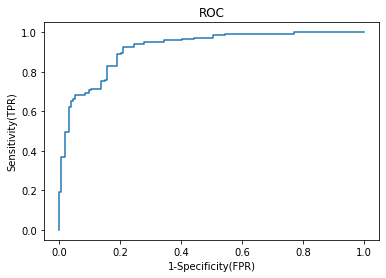

ACU=0.919542785981142


In [31]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])

# グラフ描画
plt.plot(fpr, tpr)
plt.xlabel('1-Specificity(FPR)')
plt.ylabel('Sensitivity(TPR)')
plt.title('ROC')
plt.show()

print(f'ACU={auc(fpr, tpr)}')

In [32]:
# 陽性とするthresholds（閾値）が増加
# 　正しく陽性となるデータが増加
# 　誤って陽性となるデータも増加
thresholds

array([1.99179934e+00, 9.91799335e-01, 9.77815971e-01, 9.77248698e-01,
       9.76701317e-01, 9.66978762e-01, 9.65701767e-01, 9.61163389e-01,
       9.60196664e-01, 9.59310567e-01, 9.58933799e-01, 9.55109061e-01,
       9.50221733e-01, 9.40079736e-01, 9.37938455e-01, 9.37695491e-01,
       9.37266301e-01, 9.34996696e-01, 9.31023674e-01, 9.30490679e-01,
       9.26428078e-01, 9.02334831e-01, 8.89692701e-01, 8.87804300e-01,
       8.83837865e-01, 8.79787044e-01, 8.75057201e-01, 8.66226983e-01,
       8.61966173e-01, 8.41483431e-01, 8.39524444e-01, 8.32565389e-01,
       8.13354420e-01, 8.09444639e-01, 7.92649569e-01, 7.91801726e-01,
       7.84178998e-01, 7.75249591e-01, 7.66183775e-01, 7.65680150e-01,
       7.47198847e-01, 7.46281809e-01, 7.30154086e-01, 7.24235270e-01,
       7.16331984e-01, 6.97867602e-01, 6.96789861e-01, 6.95073004e-01,
       6.94675245e-01, 6.94637319e-01, 6.91861091e-01, 6.66386755e-01,
       6.50636857e-01, 6.36071150e-01, 6.20972894e-01, 6.19280145e-01,
      

## 他クラスROC

In [33]:
# データロード
df = sns.load_dataset('iris')

# 目的変数、説明変数
y_col = 'species'
X = df.drop(columns=[y_col])
y = df[y_col]

# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 学習
model = LogisticRegression()
model.fit(X_train, y_train)

# 予測（確率）
y_pred_proba = model.predict_proba(X_test)

### macro平均

In [34]:
# one_hot
y_test_one_hot = label_binarize(y_test, classes=model.classes_)

# roc計算
fpr = {}
tpr = {}
roc_auc = {}
n_classes = len(model.classes_)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_one_hot[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

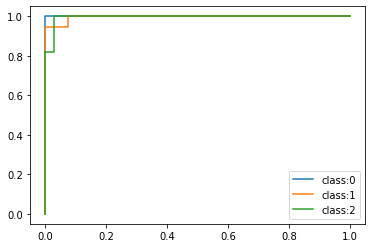

In [35]:
# それぞれのクラスのROC
for i in fpr.keys():
    plt.plot(fpr[i], tpr[i], label=f'class:{i}')
    plt.legend()

In [36]:
# 線形補完（np.interp）
all_x = np.arange(7)
data_x = [0, 2, 5, 6]
data_y = [0, 2, 4, 6]
# index:1,3,5の要素を補完
np.interp(all_x, data_x, data_y)

array([0.        , 1.        , 2.        , 2.66666667, 3.33333333,
       4.        , 6.        ])

In [37]:
# 必要なxのリスト：各クラスのfprのユニーク値
all_fpr = np.unique(np.concatenate([fpr[i] for i in fpr]))

# 線形補完
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    
mean_tpr = mean_tpr / n_classes

In [38]:
# マクロ平均格納
fpr['macro'] = all_fpr
tpr['macro'] = mean_tpr
roc_auc['macro'] = auc(all_fpr, mean_tpr)

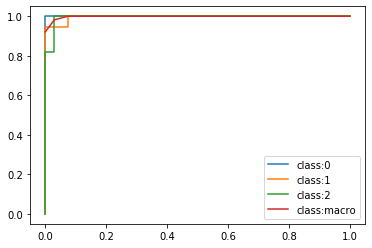

In [39]:
# macro平均を含めたROC
for i in fpr.keys():
    plt.plot(fpr[i], tpr[i], label=f'class:{i}')
    plt.legend()

### micro平均

In [48]:
# ミクロ平均格納
fpr['micro'], tpr['micro'], _ = roc_curve(y_test_one_hot.ravel(), y_pred_proba.ravel())
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])

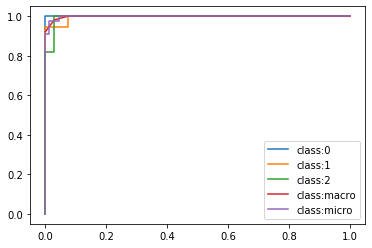

In [50]:
# micro平均を含めたROC
for i in fpr.keys():
    plt.plot(fpr[i], tpr[i], label=f'class:{i}')
    plt.legend()